# 강의 : https://www.edwith.org/boostcourse-ds-511/joinLectures/40396
# 강의자 repo : https://github.com/corazzon/boostcourse-ds-511

# 2.1 EDA를 통해 데이터 탐색하기

## 환경 세팅

In [1]:
!git clone https://github.com/corazzon/boostcourse-ds-511.git


import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')


diabetes_df = pd.read_csv('boostcourse-ds-511/data/diabetes.csv')
diabetes_df['Pregnancies_high'] = (diabetes_df['Pregnancies'] > 6).astype(int)
print(diabetes_df.shape)
diabetes_df.head(3)

Cloning into 'boostcourse-ds-511'...
remote: Enumerating objects: 67, done.
remote: Counting objects: 100% (67/67), done.
remote: Compressing objects: 100% (51/51), done.
remote: Total 67 (delta 32), reused 49 (delta 16), pack-reused 0
Unpacking objects: 100% (67/67), done.
(768, 10)


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high
0,6,148,72,35,0,33.6,0.627,50,1,0
1,1,85,66,29,0,26.6,0.351,31,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1


## 2.1.7 시각화를 통한 변수간의 차이 이해하기
- 시각화를 통해 가설을 간접적으로 검토
- regplot
- lmplot
- pairplot
- PairGrid

### 1) 혈당 수치와 인슐린 수치의 상관관계 시각화 (regplot, lmplot)
- regplot(), lmplot()을 통해 두 속성 간의 산점도 및 추정 회귀선 시각화
- regplot과 달리 lmplot은 hue 파라메터 제공
- Insulin 속성에 0값(결측치)이 많아 회귀선 기울기가 낮게 나타남
- Insulin 속성의 0값을 제외하고 시각화

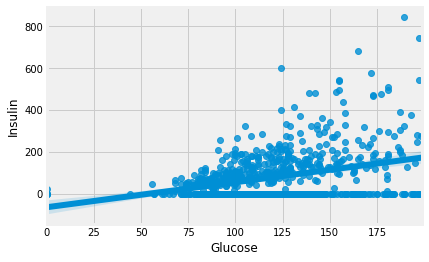

In [2]:
sns.regplot(x='Glucose', y='Insulin', data=diabetes_df)
plt.show()

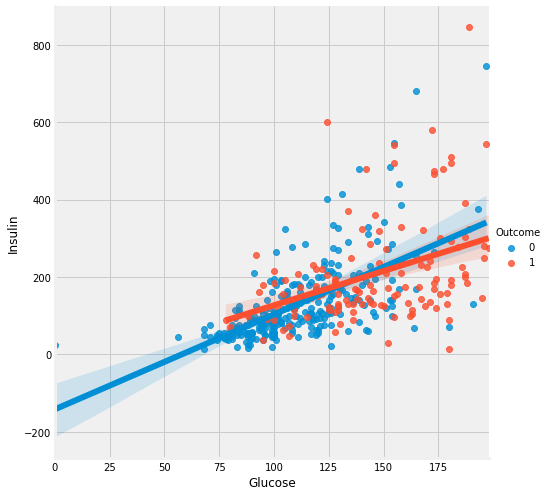

In [3]:
sns.lmplot(x='Glucose', y='Insulin', hue='Outcome',
           data=diabetes_df[diabetes_df.Insulin != 0], height=7)
plt.show()

### 2) 전체 속성들 간의 관계 시각화 (pairplot, PairGrid)

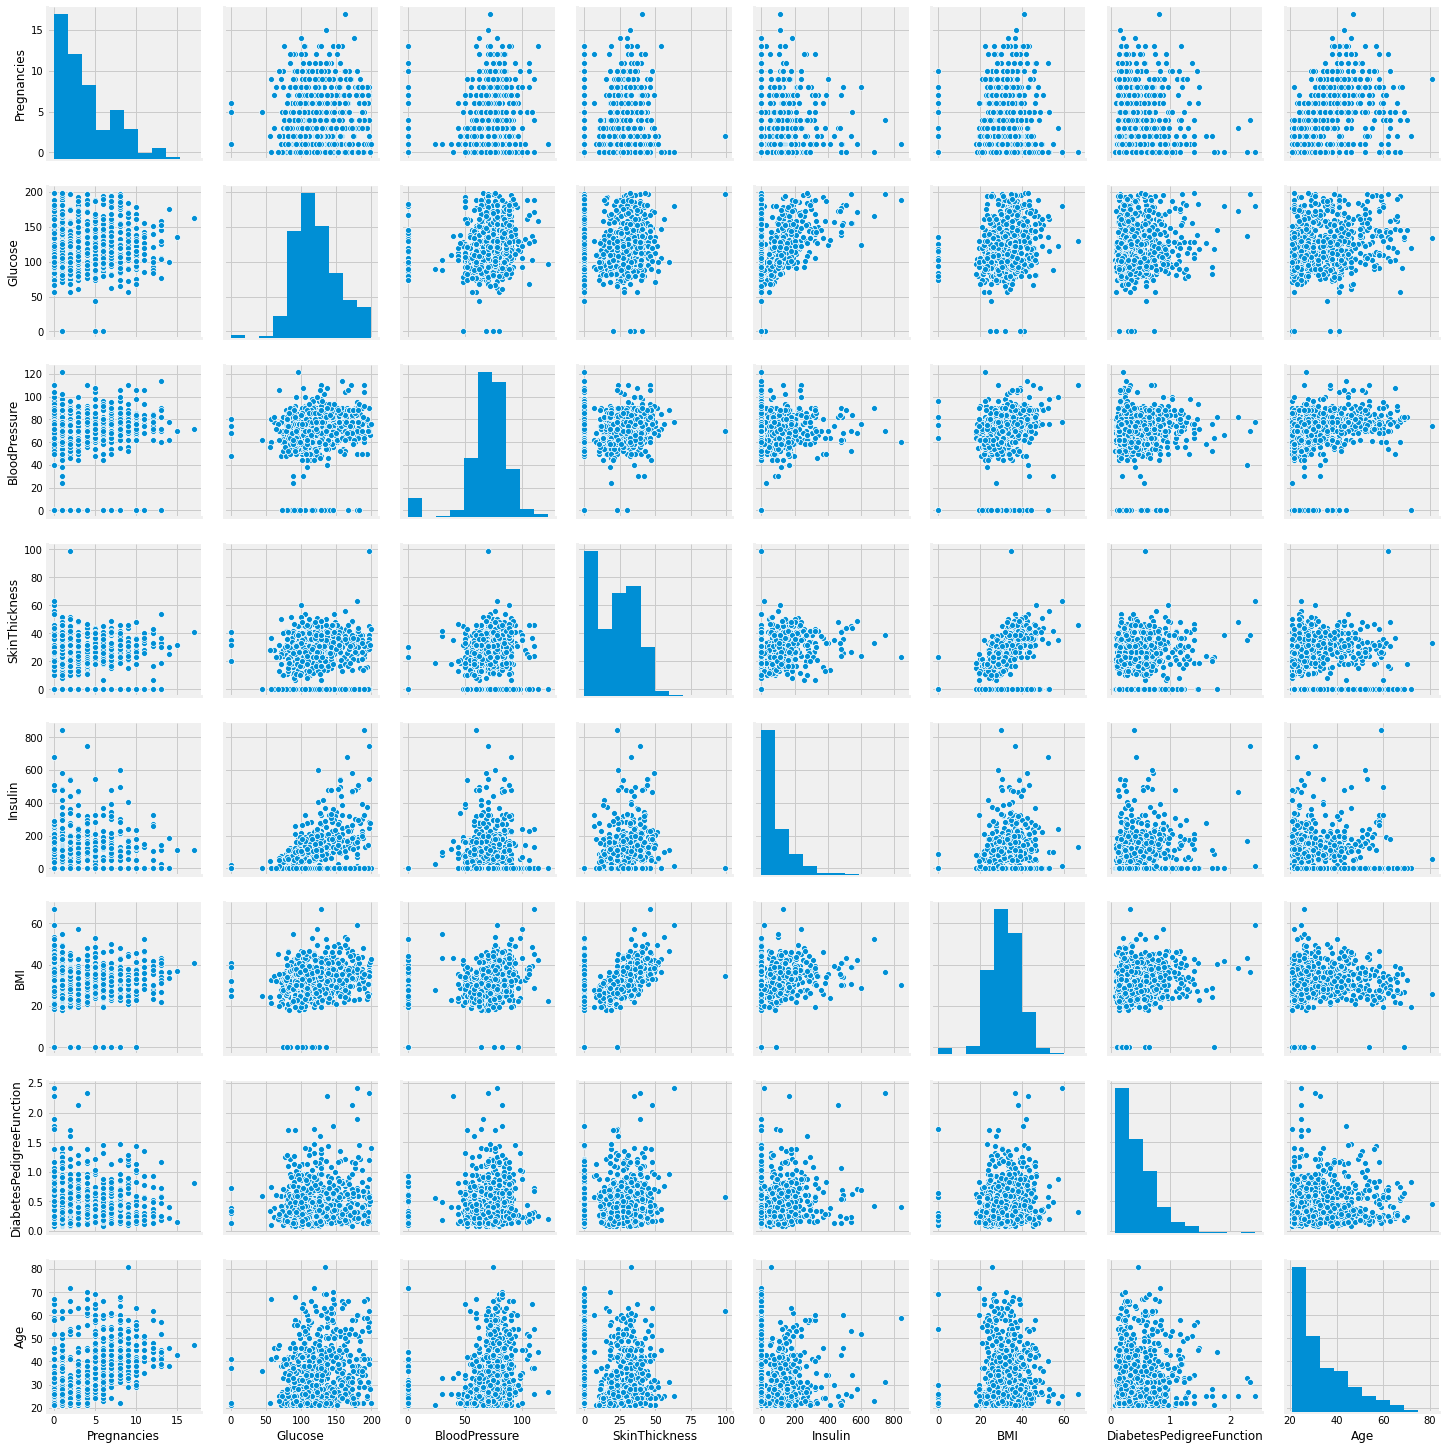

In [4]:
sns.pairplot(diabetes_df.drop(columns=['Outcome', 'Pregnancies_high']))
plt.show()

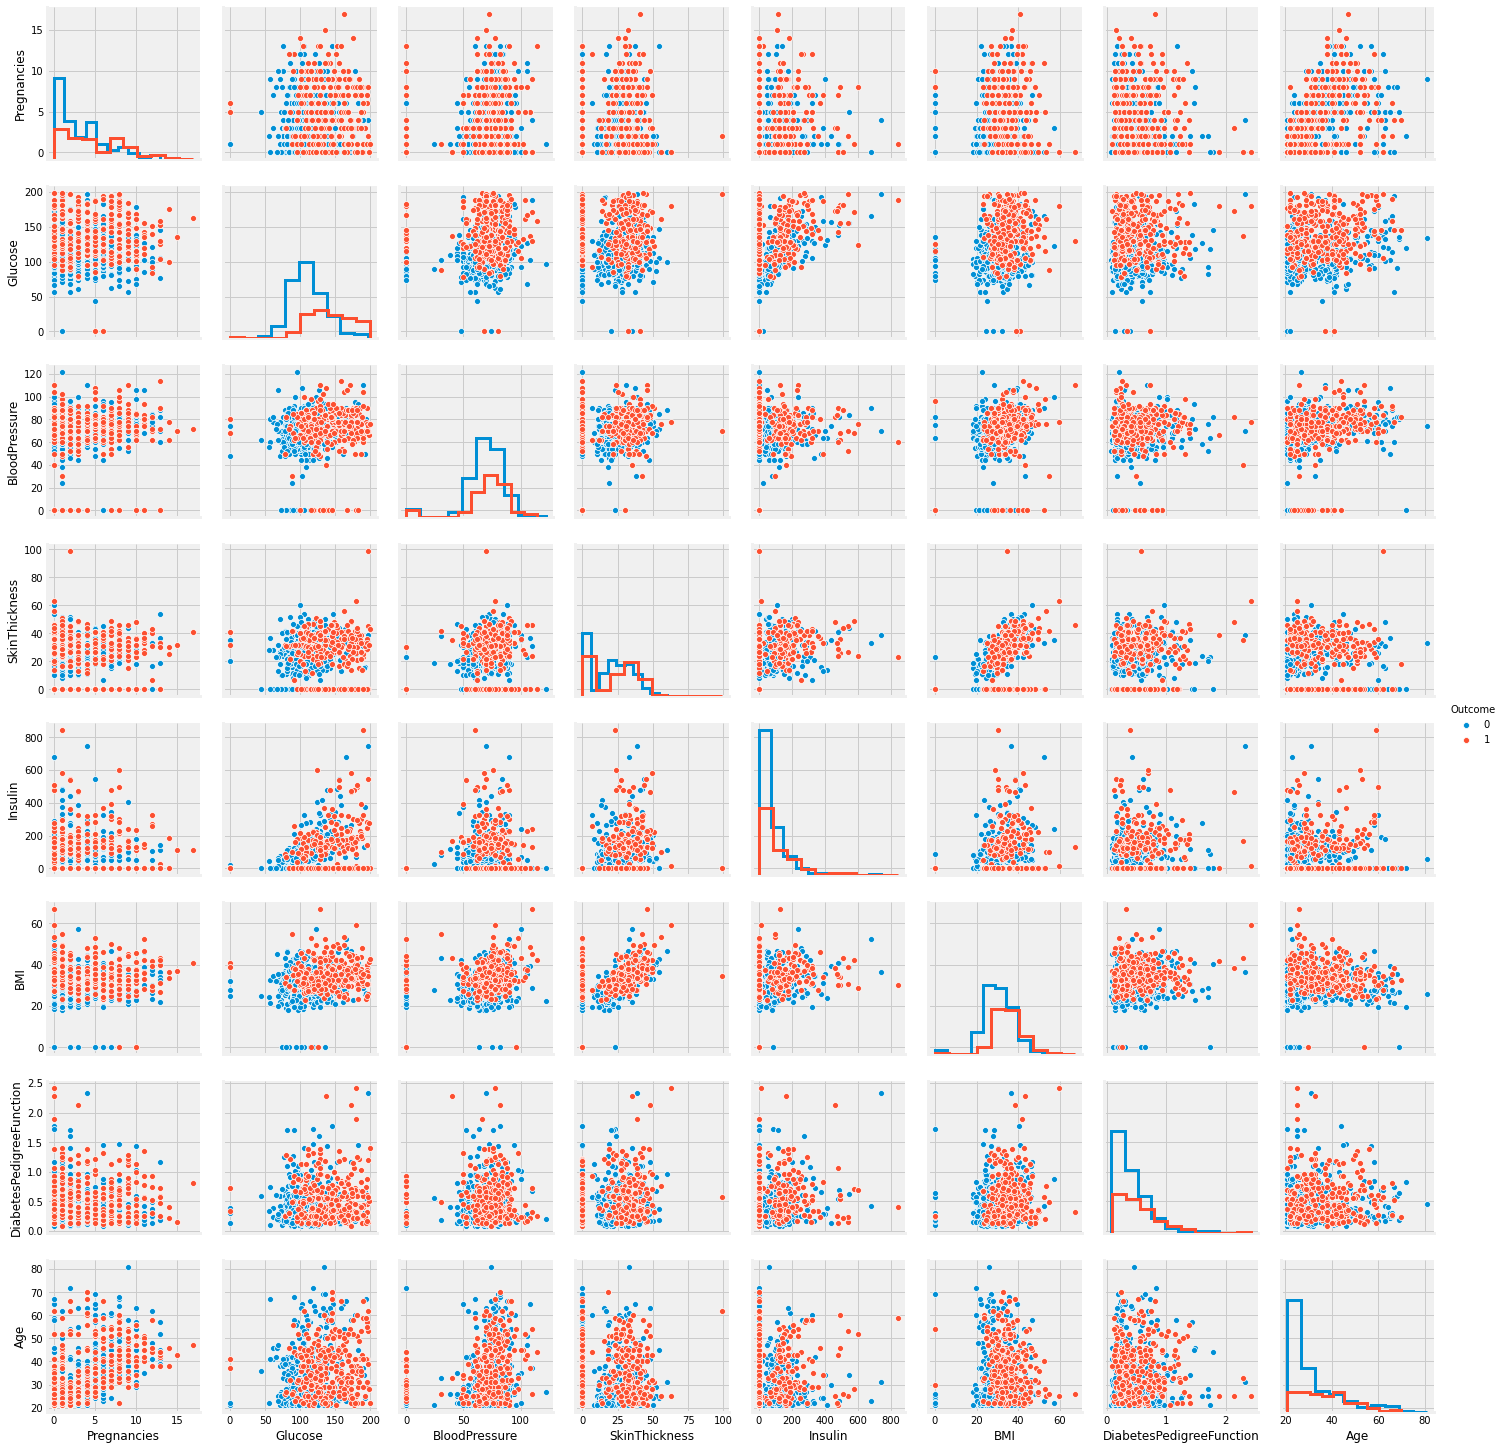

In [5]:
g = sns.PairGrid(diabetes_df.drop(columns='Pregnancies_high'), hue="Outcome")
g = g.map_diag(plt.hist, histtype="step", linewidth=3)
g = g.map_offdiag(sns.scatterplot)
g = g.add_legend()
plt.show()

## 2.1.8 피처엔지니어링을 위한 상관 계수 분석하기
- corr()
- heatmap()
- lmplot()

### 1) 상관계수 시각화 (corr, heatmap)
- 데이터 전체의 속성별 상관계수를 시각화함으로써 속성 간 상관관계를 추정

In [6]:
diabetes_df.corr().style.background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Pregnancies_high
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898,0.821533
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581,0.151271
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068,0.122218
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752,-0.030295
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548,-0.031523
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695,0.039075
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844,0.016022
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356,0.468883
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000,0.237557
Pregnancies_high,0.821533,0.151271,0.122218,-0.030295,-0.031523,0.039075,0.016022,0.468883,0.237557,1.000000


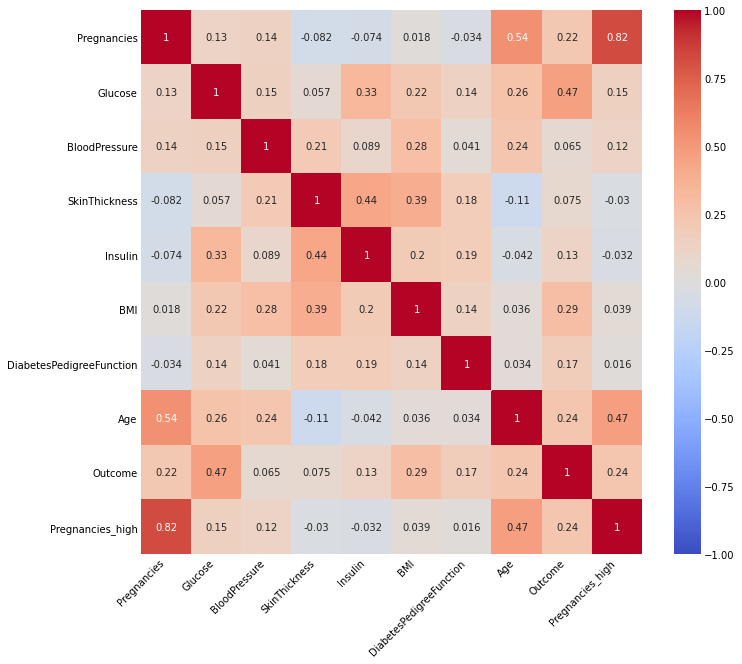

In [7]:
plt.figure(figsize=(10, 10))
sns.heatmap(diabetes_df.corr(), vmin=-1, cmap='coolwarm', annot=True)
plt.xticks(rotation=45, ha='right')
plt.show()

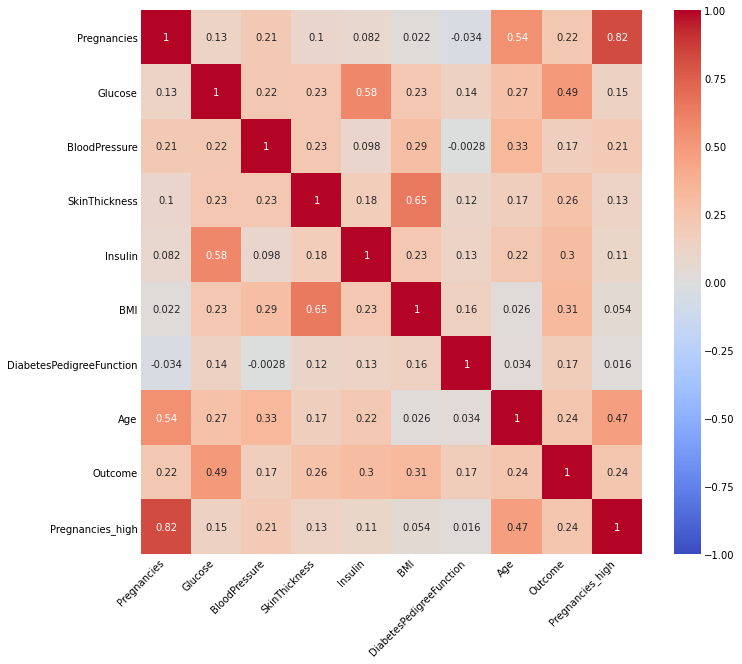

In [8]:
null_df = diabetes_df.replace(0, np.nan)
null_df[['Pregnancies', 'Pregnancies_high', 'Outcome']] = diabetes_df[['Pregnancies', 'Pregnancies_high', 'Outcome']]

plt.figure(figsize=(10, 10))
sns.heatmap(null_df.corr(), vmin=-1, cmap='coolwarm', annot=True)
plt.xticks(rotation=45, ha='right')
plt.show()

- 결측치 제거 후 Outcome과 상관관계가 높은 속성은 Glucose, Insulin, BMI 등으로 나타남
- 입력 속성 간 상관관계가 높은 쌍은 (Pregnancies, Age), (Glucose, Insulin), (BloodPresure, Age), (SkinThickness, BMI) 등임. 선형 모델을 적용할 때는 해당 쌍을 동시에 사용하는 것에 주의해야 함

### 2) 두 속성 간 상관관계 시각화 (lmplot)
- heatmap에서 상관계수가 높게 나타난 두 속성을 더 구체적으로 시각화

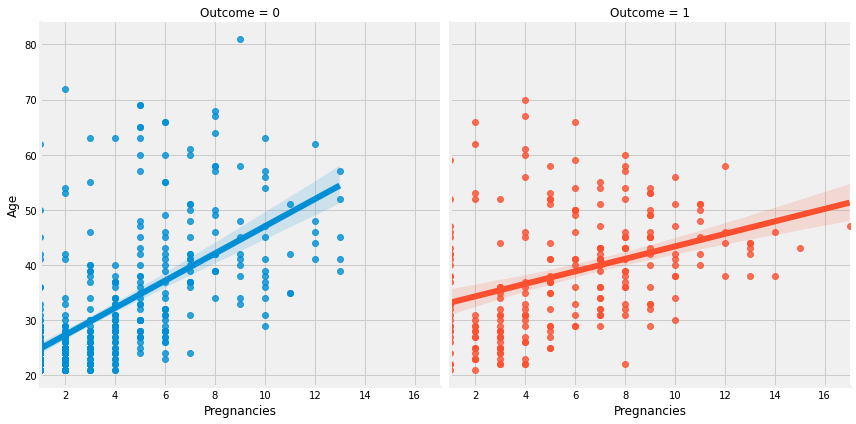

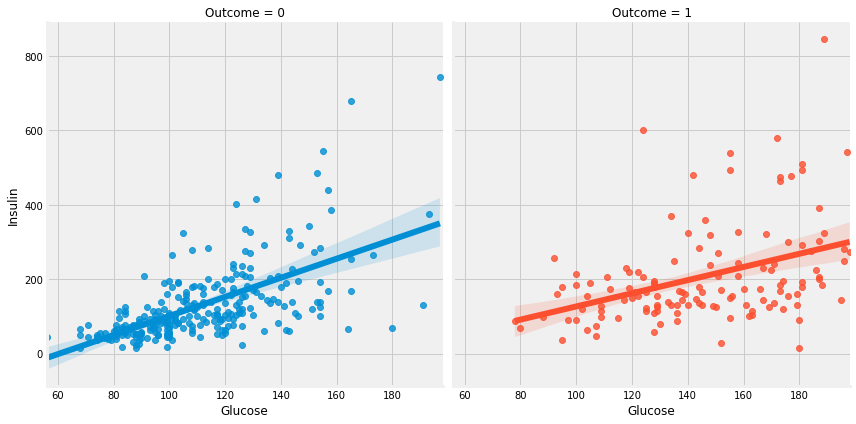

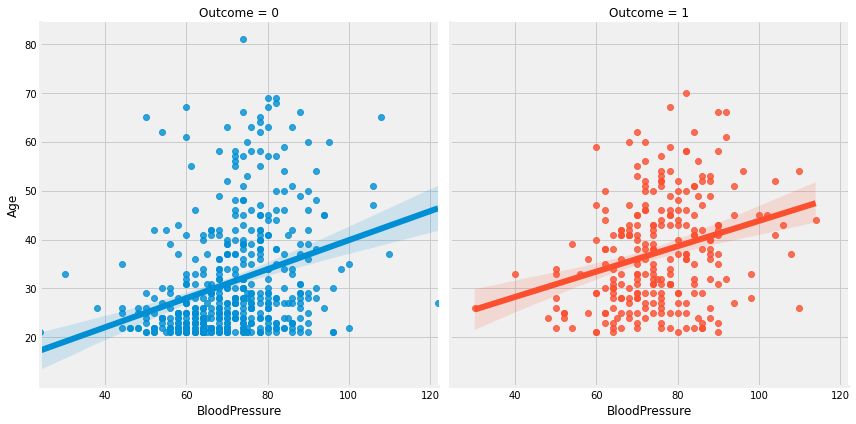

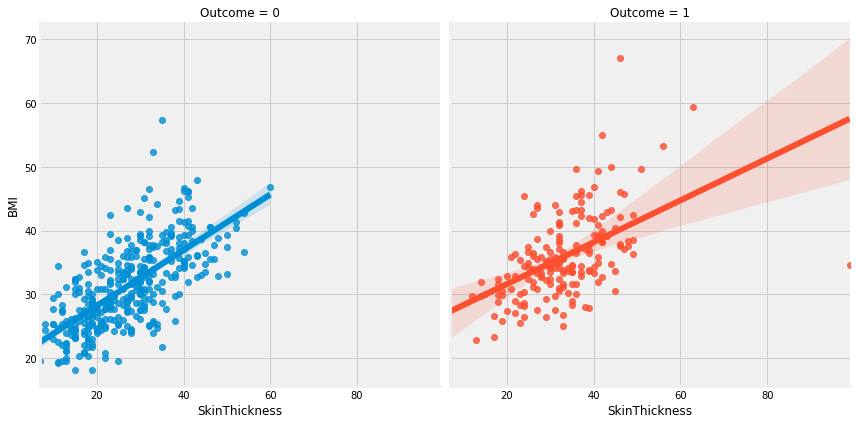

In [9]:
for x, y in zip(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness'],
                ['Age', 'Insulin', 'Age', 'BMI']):
  sns.lmplot(x=x, y=y, hue='Outcome', col='Outcome', height=6,
             data=diabetes_df[(diabetes_df[x] != 0) & (diabetes_df[y] != 0)])
  plt.show()
  print('\n')